In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fish_market = pd.read_csv('data/Fish.csv')

In [3]:
fish_market.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
bream_length = fish_market.loc[ fish_market['Species']=='Bream']['Length2'].to_list()

In [5]:
bream_weight = list(fish_market.loc[ fish_market['Species']=='Bream']['Weight'])

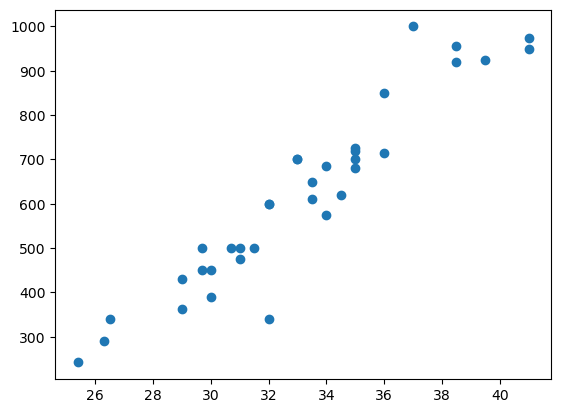

In [6]:
plt.scatter(bream_length, bream_weight)

In [7]:
smelt_length = list(fish_market.loc[ fish_market['Species']=='Smelt']['Length2'])
smelt_weight = list(fish_market.loc[ fish_market['Species']=='Smelt']['Weight'])

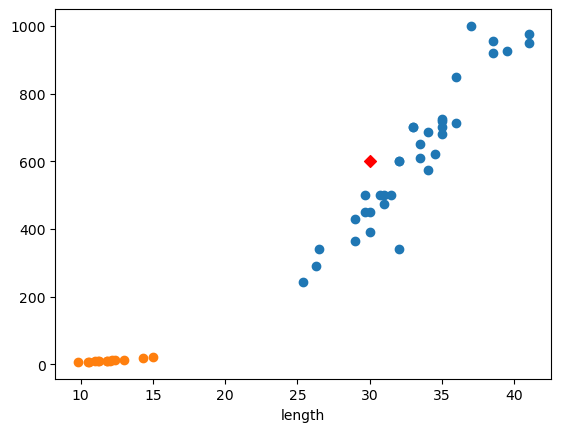

In [8]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30],[600], color='red', marker='D')
plt.show()

In [9]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
fish_data = [[l, w] for l, w in zip(length, weight)] #  길이, 무게 리스트를 2차원으로 만든다 

In [11]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [12]:
len(fish_data)

49

In [13]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5) #  하이파 파라미터, 최근접 이웃 개수 

In [15]:
kn.fit(fish_data, fish_target )

KNeighborsClassifier()

In [16]:
kn.score(fish_data, fish_target) #  R 제곱 값 

1.0

In [17]:
kn.predict([[30, 600]])

array([1])

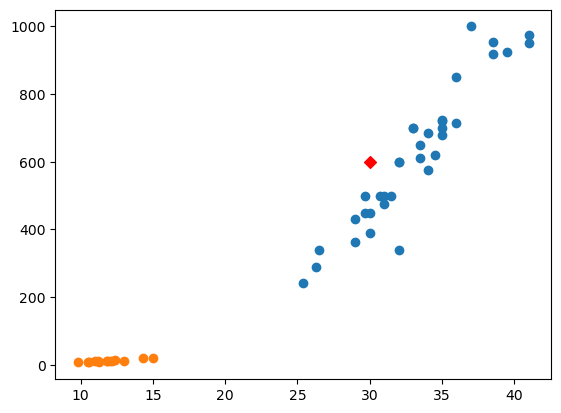

In [18]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30], [600] , marker='D', color='red')
plt.show()

In [19]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [20]:
35/49

0.7142857142857143

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, test_size=0.3)
#  test_size 기본적으로 0.3(30%)의 테스트 데이터 크기를 갖는다 

In [23]:
len(fish_data)

49

In [24]:
print(len(train_input), len(test_target))

34 15


In [25]:
print(test_target)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [26]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, test_size=0.3, stratify=fish_target)

In [27]:
print(len(train_input), len(test_target))

34 15


In [28]:
print(test_target)

[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [29]:
49*0.7

34.3

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_input, train_target)

KNeighborsClassifier()

In [31]:
knn.score(test_input, test_target)

1.0

In [32]:
knn.predict([[25,150]])

array([0])

In [33]:
train_input

[[12.2, 12.2],
 [32.0, 600.0],
 [34.5, 620.0],
 [30.7, 500.0],
 [32.0, 600.0],
 [35.0, 720.0],
 [11.3, 8.7],
 [36.0, 714.0],
 [29.0, 430.0],
 [11.2, 9.8],
 [29.7, 500.0],
 [12.0, 9.8],
 [31.0, 475.0],
 [37.0, 1000.0],
 [29.0, 363.0],
 [33.0, 700.0],
 [14.3, 19.7],
 [31.5, 500.0],
 [39.5, 925.0],
 [9.8, 6.7],
 [36.0, 850.0],
 [10.5, 7.5],
 [33.5, 610.0],
 [10.6, 7.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [13.0, 12.2],
 [30.0, 450.0],
 [33.0, 700.0],
 [15.0, 19.9],
 [32.0, 340.0],
 [33.5, 650.0],
 [30.0, 390.0],
 [41.0, 975.0]]

In [34]:
train_input = np.array(train_input)
print(train_input.shape)

(34, 2)


In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_input, train_target)

KNeighborsClassifier()

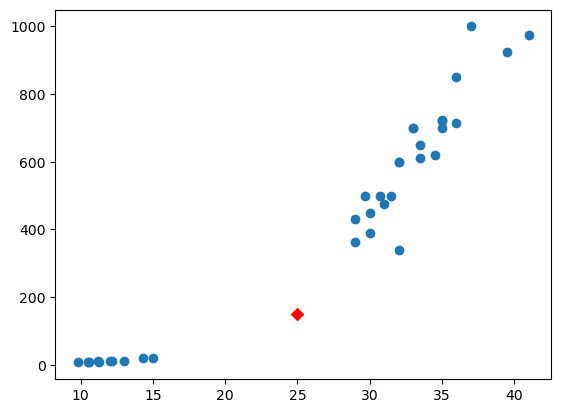

In [36]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter([25], [150] , marker='D', color='red')
plt.show()

In [37]:
knn.predict([[25,150]])

array([0])

In [38]:
distance, idxs = knn.kneighbors([[25, 150]])
print(distance)
print(idxs)

[[130.48375378 130.73859415 138.32150953 138.39320793 140.80142045]]
[[29 16 26  0 11]]


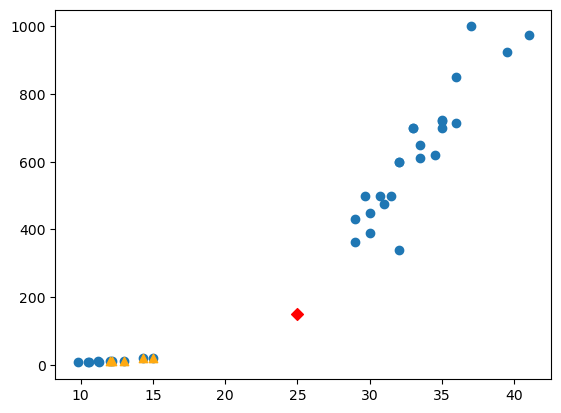

In [39]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter([25], [150] , marker='D', color='red')
plt.scatter(train_input[idxs, 0], train_input[idxs, 1], marker='^', color='#fa1')
plt.show()

In [40]:
#  시각화는 잘 되었지만 무게, 길이의 표준화가 안되어서 이런 현상 발생 

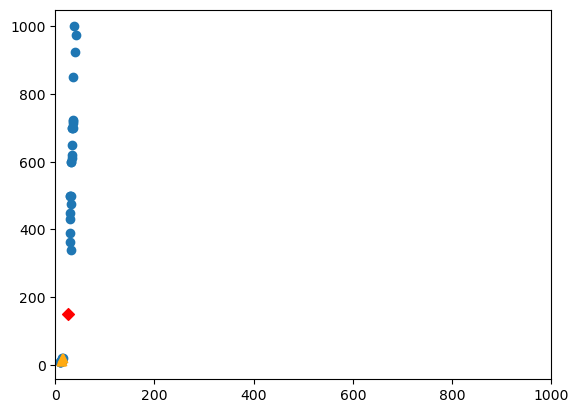

In [41]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter([25], [150] , marker='D', color='red')
plt.scatter(train_input[idxs, 0], train_input[idxs, 1], marker='^', color='#fa1')
plt.xlim(0, 1000)
plt.show()

정규화 : minmax
표준화 : standard 


표준화 : z-score 
평균 : np.mean()
편차 : 평균과의 차이값
분산 : 편차 제곱의 평균
표준편차 : 분산의 제곱근 , np.std()
표준점수 : x / 표준편차 

z-score = (x-mean)/std

In [43]:
train_input.shape

(34, 2)

In [44]:
train_input[:5]

array([[ 12.2,  12.2],
       [ 32. , 600. ],
       [ 34.5, 620. ],
       [ 30.7, 500. ],
       [ 32. , 600. ]])

In [45]:
aa = train_input/10
print(aa[:5])

[[ 1.22  1.22]
 [ 3.2  60.  ]
 [ 3.45 62.  ]
 [ 3.07 50.  ]
 [ 3.2  60.  ]]


In [46]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input - mean) / std
print(train_scaled[:5])
print(train_scaled.shape)

[[-1.4703534  -1.35773091]
 [ 0.49361864  0.48368306]
 [ 0.74159491  0.54633749]
 [ 0.36467098  0.17041086]
 [ 0.49361864  0.48368306]]
(34, 2)


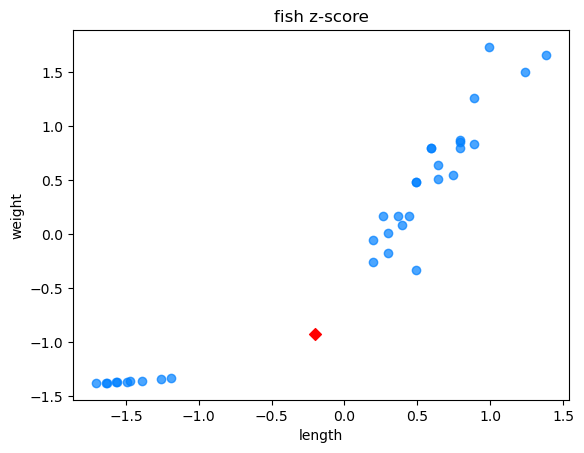

In [47]:
new = (([25, 150]) - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1], alpha=0.7, color='#0080ff')
plt.scatter(new[0], new[1] , marker='D', color='red')
plt.title('fish z-score')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [48]:
knn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [49]:
knn.predict([new])

array([1])

In [50]:
test_input_scaled = (test_input - mean) / std
knn.score(test_input_scaled, test_target)

1.0

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knr = KNeighborsRegressor(n_neighbors=3)
# knr.fit(X, y)
# knr.score(t1, t2)
# knr.predict([[]])

KNN회귀모델 이용하여 perch(농어)의 길이를 입력하여 무게 예측 
1. 농어 무게, 길이 가져오기
2. 무게 길이 시각화
3. train set, test set 분리
4. 학습
    입력데이터는 2차원
5. 결정계수(R제곱) 분류에서는 정확도 


In [54]:
fish_market.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [55]:
perch = fish_market[fish_market['Species'] == 'Perch'][['Length2', 'Weight']]
perch.head()

,Length2,Weight
72,8.4,5.9
73,13.7,32.0
74,15.0,40.0
75,16.2,51.5
76,17.4,70.0


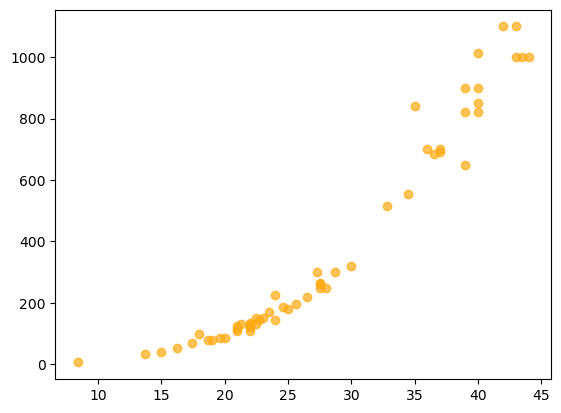

In [56]:
plt.scatter(perch['Length2'], perch['Weight'] , alpha=0.7, color="#fa1")

In [134]:
from sklearn.model_selection import train_test_split

fish_length = np.array(perch['Length2'])

fish_weight = np.array(perch['Weight'])

# print(fish_length.shape)
# print(fish_length[:5])
# print(fish_weight[:5])

X_train, X_test, y_train, y_test = train_test_split(fish_length, fish_weight, test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


In [136]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

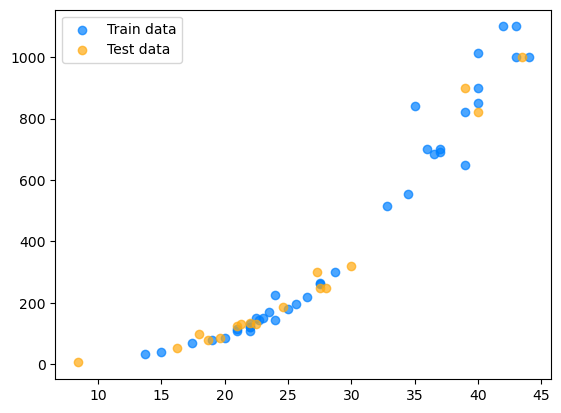

In [138]:
plt.scatter(X_train, y_train, alpha=0.7, color="#0080ff", label='Train data')
plt.scatter(X_test, y_test, alpha=0.7, color="#fa1", label='Test data')
plt.legend()
plt.show()

In [146]:
knr.n_neighbors = 3

In [147]:
knr.score(X_test, y_test)

0.9766857219041255

결정계수 R제곱 = 1 - ( ∑(입력-예측)^2 / ∑(입력-평균)^2 )   
1에 가까울 수록 정답에 가깝다    
분모가 0에 가까울 수록 입력-평균이 0에 가깝다   

In [149]:
knr.score(X_train, y_train) 

0.9793378102926132

과소적합(underfitting) : 트레인 데이터보다 테스트 데이터를 더 잘맞춤   
과대적합(overfitting) : 트레인 데이터는 잘 맞추는데 테스트 데이터는 잘 못 맞춤 

In [157]:
from sklearn.metrics import mean_absolute_error
p_test = knr.predict(X_test)
print(p_test)

[  47.33333333   78.33333333  247.66666667  118.33333333  141.66666667
  921.66666667  275.          183.33333333  773.33333333  115.
 1033.33333333   47.33333333  275.          247.66666667   93.33333333
  120.           78.33333333]


In [161]:
mae = mean_absolute_error(y_test, p_test)
print(mae)

30.30980392156862


In [167]:
from sklearn.metrics import root_mean_squared_error
p_test = knr.predict(X_test)
rmse = root_mean_squared_error(y_test, p_test) #  테스트 데이터, 예측 데이터 
print(rmse)

45.8757728648544


In [61]:
knr.predict([[30]])

array([279.])

In [62]:
# distance, idxs = knn.kneighbors([[30]])
# print(distance)
# print(idxs)

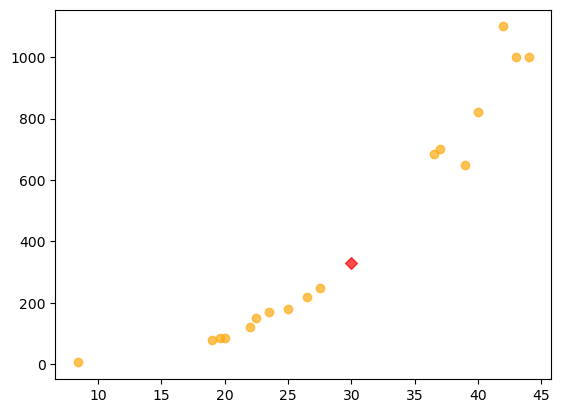

In [63]:
plt.scatter(X_test, y_test, alpha=0.7, color="#fa1")
plt.scatter([30], [330.4], alpha=0.7, marker='D', color="red" )